# 회귀(Regression)
## "주택가격 예측"
- 다중선형회귀(Multiple Linear Regression): StatsModel
- 다중선형회귀(Multiple Linear Regression): scikit-learn

### 수행절차    
1. 문제 정의
2. 데이터 수집
3. 데이터 탐색
4. 특성 생성
5. 모델링
6. 평가

## 1. 문제 정의
"주택의 주변 특성들에 따라 예측한 주택가격은 얼마인가?"

## 2. 데이터 수집
- Plain Text 파일을 [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)에서 다운로드

In [91]:
# Pandas를 이용하여 훈련 및 검증 데이터 로드
import pandas as pd
df_data = pd.read_csv('data/bostonhousing.csv')

## 3. 데이터 탐색

In [92]:
# 로드된 데이터 출력
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


### 3.1 데이터 정보 확인
### 기본정보
- 보스턴시의 1978년 주택가격

#### 타겟 데이터
- MEDV: 본인 소유의 주택가격(중앙값)(단위: $1,000) 

#### 특성 데이터
- CRIM: 자치시(Town)별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 거주지역의 비율
- INDUS: 비소매상업지역이 점유하고 있는 토지의 비율
- CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 10ppm 당 농축 일산화질소량
- RM: 주택 1가구당 평균 방의 개수
- AGE: 1940년 이전에 건축된 소유주택의 비율
- DIS: 5개의 보스턴 직업센터까지의 접근성 지수
- RAD: 방사형 도로까지의 접근성 지수
- TAX: 10,000 달러 당 재산세율
- PTRATIO: 자치시(Town)별 학생/교사 비율
- BLACK: 1000(Bk-0.63)^2(Bk는 자치시별 흑인 비율)
- LSTAT: 인구 중 하위계층의 비율(%)

### 3.2 데이터 구조 확인

In [93]:
print(df_data.shape) # 훈련 데이터의 행과 열
print(df_data.info()) # 훈련(검증) 데이터의 데이터 유형

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
BLACK      506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB
None


### 3.3 Null 값 확인

In [94]:
df_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
MEDV       0
dtype: int64

- 데이터의 Null 값은 없음

### 3.4 기술통계량 분석

In [95]:
df_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


- 데이터의 *CHAS* 값은 범주형임
- 데이터의 *CHAS* 값을 제외한 모든 변수는 연속형임
- 데이터의 *TAX* 값은 상대적으로 범위가 큼
- 데이터의 *BLACK* 값은 상대적으로 범위가 큼

### 3.5 데이터 시각화를 통한 분석

In [96]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns # 고급 차트 작성을 위한 라이브러리
sns.set()

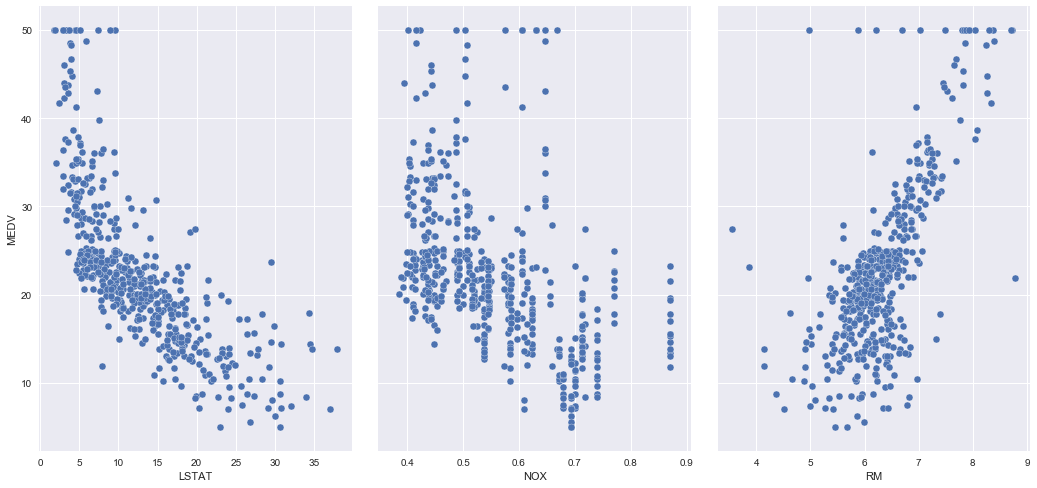

In [97]:
# 각 변수와 판매량과의 관계 파악을 위한 Pairplot
#l_cols = ['LSTAT', 'NOX', 'RM', 'MEDV']
#df_pairplot = df_train[l_cols]
#sns.pairplot(df_pairplot)
sns.pairplot(df_data, x_vars=['LSTAT', 'NOX', 'RM'], y_vars='MEDV', size=7, aspect=0.7)
plt.show()

## 4. 특성 구성

In [98]:
# 단일 파일 이므로 Skip
#df_train_test = [df_train, df_test] # 훈련 데이터와 검증 데이터 결합

### 4.1 특성 조작(Feature Engineering)

#### 4.1.1 세금(*Tax*)

##### 4.1.1.1 범주화

In [99]:
# 본 예제에서는 추가적인 범주화를 수행하지 않음

### 4.2 특성 및 레이블 타겟 분리

In [100]:
# 불필요 변수 제외
l_features_drop = ['MEDV']

In [101]:
# 데이터의 특성과 레이블 분리
df_data_feature = df_data.drop(l_features_drop, axis=1)
#df_data_feature = df_data.iloc[:,[1,2,3]]
df_data_label = df_data['MEDV']
#df_train_label = df_train.iloc[:,[4]]

In [102]:
print(df_data_feature.shape)
print(df_data_feature.head())

(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900    1  296   
1  0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671    2  242   
2  0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671    2  242   
3  0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622    3  222   
4  0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622    3  222   

     PTRATIO       BLACK  LSTAT  
0  15.300000  396.899994   4.98  
1  17.799999  396.899994   9.14  
2  17.799999  392.829987   4.03  
3  18.700001  394.630005   2.94  
4  18.700001  396.899994   5.33  


In [103]:
print(df_data_label.shape)
print(df_data_label.head())

(506,)
0    24.000000
1    21.600000
2    34.700001
3    33.400002
4    36.200001
Name: MEDV, dtype: float64


In [104]:
# 불필요 변수 제외
l_features_drop = ['ID']

In [105]:
# 검증 데이터의 특성과 레이블 분리
df_test_feature = df_test.drop(l_features_drop, axis=1)
#df_test_feature = df_train.iloc[:,[3, ,4 ,5, 6, 7, 8, 9, 10, 11, 12, 13]]
#df_test_label = df_train['MEDV']
#df_test_label = df_train.iloc[:,[3]]

### 4.3 훈련과 검증 데이터 분할

In [106]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data_feature, df_data_label, test_size=0.3, random_state=1)
#X_train = df_train_feature
#X_test = df_test_feature
#y_train = df_train_label
# y_test = df_test_label

C:\Users\jayhu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [107]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT
13,0.62976,0.0,8.14,0,0.538,5.949,61.799999,4.7075,4,307,21.000000,396.899994,8.26
61,0.17171,25.0,5.13,0,0.453,5.966,93.400002,6.8185,8,284,19.700001,378.079987,14.44
377,9.82349,0.0,18.10,0,0.671,6.794,98.800003,1.3580,24,666,20.200001,396.899994,21.24
39,0.02763,75.0,2.95,0,0.428,6.595,21.799999,5.4011,3,252,18.299999,395.630005,4.32
365,4.55587,0.0,18.10,0,0.718,3.561,87.900002,1.6132,24,666,20.200001,354.700012,7.12


In [108]:
print(X_train.head()) # 훈련 데이터의 특성 값 확인
print(len(X_train)) # 훈련 데이터의 특성 갯수 확인
print(X_test.head()) # 검증 데이터의 특성 값 확인
print(len(X_test)) # 검증 데이터의 특성 갯수 확인
print(y_train.head()) # 훈련 데이터의 레이블 값 확인
print(len(y_train)) # 훈련 데이터의 레이블 갯수 확인
#print(y_test.head()) # 검증 데이터의 레이블 값 확인
#print(len(y_test)) # 검증 데이터의 레이블 갯수 확인

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
13   0.62976   0.0   8.14     0  0.538  5.949  61.799999  4.7075    4  307   
61   0.17171  25.0   5.13     0  0.453  5.966  93.400002  6.8185    8  284   
377  9.82349   0.0  18.10     0  0.671  6.794  98.800003  1.3580   24  666   
39   0.02763  75.0   2.95     0  0.428  6.595  21.799999  5.4011    3  252   
365  4.55587   0.0  18.10     0  0.718  3.561  87.900002  1.6132   24  666   

       PTRATIO       BLACK  LSTAT  
13   21.000000  396.899994   8.26  
61   19.700001  378.079987  14.44  
377  20.200001  396.899994  21.24  
39   18.299999  395.630005   4.32  
365  20.200001  354.700012   7.12  
354
        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
307  0.04932  33.0   2.18     0  0.472  6.849  70.300003  3.1827    7  222   
343  0.02543  55.0   3.78     0  0.484  6.696  56.400002  5.7321    5  370   
47   0.22927   0.0   6.91     0  0.448  6.030  85.500000  5.6894    3  233   

## 5. 모델링

In [109]:
# 모델링을 위한 라이브러리
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

### 5.1 모델 생성 및 훈련

#### 5.1.1 다중선형회귀(Multiple Linear Regression): StatsModel

In [110]:
# 다중선형회귀(Multiple Linear Regression): StatsModel
reg_mlr_sm = sm.ols(formula='MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+BLACK+LSTAT', data=df_data).fit()

#### 5.1.2 다중선형회귀(Multiple Linear Regression): scikit-learn

In [111]:
# 다중선형회귀(Multiple Linear Regression): scikit-learn
reg_mlr_skl = LinearRegression(
                               #fit_intercept=True
                               #normalize=False
                               #copy_X=True
                               #n_jobs=1
                               ).fit(X_train, y_train)

### 5.2 예측

#### 5.2.1 다중선형회귀(Multiple Linear Regression): StatsModel

In [112]:
y_pred_mlr_sm = reg_mlr_sm.predict(X_test)
y_pred_mlr_sm.head()

307    32.709051
343    27.706479
47     18.036552
67     21.113385
362    18.228469
dtype: float64

#### 5.2.2 다중선형회귀(Multiple Linear Regression): scikit-learn

In [113]:
y_pred_mlr_skl = reg_mlr_skl.predict(X_test)
y_pred_mlr_skl[0:5]

array([32.39146467, 27.94401273, 17.83762848, 21.66941362, 18.93639658])

## 6. 평가

### 6.1 다중선형회귀(Multiple Linear Regression): StatsModel

In [114]:
# 절편(Intercept)과 회귀계수(Coefficient) 출력
reg_mlr_sm.params

Intercept    36.459491
CRIM         -0.108011
ZN            0.046420
INDUS         0.020559
CHAS          2.686734
NOX         -17.766615
RM            3.809865
AGE           0.000692
DIS          -1.475567
RAD           0.306050
TAX          -0.012335
PTRATIO      -0.952747
BLACK         0.009312
LSTAT        -0.524758
dtype: float64

In [115]:
# 결정계수(R-squared) 출력
print('R-squaured:', reg_mlr_sm.rsquared)

R-squaured: 0.740642665185169


In [116]:
# 회귀계수(Coefficient)에 대한 P-value 출력
print('p-values:', reg_mlr_sm.pvalues)

p-values: Intercept    3.283421e-12
CRIM         1.086811e-03
ZN           7.781101e-04
INDUS        7.382875e-01
CHAS         1.925030e-03
NOX          4.245629e-06
RM           1.979447e-18
AGE          9.582294e-01
DIS          6.013498e-13
RAD          5.070517e-06
TAX          1.111637e-03
PTRATIO      1.308830e-12
BLACK        5.728592e-04
LSTAT        7.776882e-23
dtype: float64


In [117]:
reg_mlr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 24 Jul 2018   Prob (F-statistic):          6.72e-135
Time:                        17:11:23   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
BLACK          0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
# 평균제곱오차(MSE), 평균제곱근오차(RMSE) 출력
print('Mean Squared Error: %.2f' % reg_mlr_sm.mse_total)
print('Root Mean Squared Error: %.2f' % np.sqrt(reg_mlr_sm.mse_total))

Mean Squared Error: 84.59
Root Mean Squared Error: 9.20


### 6.2 다중선형회귀(Multiple Linear Regression): scikit-learn

In [118]:
# 절편(Intercept) 및 회귀계수(Coefficient) 출력
print(reg_mlr_skl.intercept_)
print(reg_mlr_skl.coef_)
list(zip(X_train.columns, reg_mlr_skl.coef_))

46.39649668947959
[-9.85424628e-02  6.07841109e-02  5.91715877e-02  2.43956003e+00
 -2.14699686e+01  2.79581368e+00  3.57459426e-03 -1.51627215e+00
  3.07541781e-01 -1.12800158e-02 -1.00546643e+00  6.45018461e-03
 -5.68834547e-01]


[('CRIM', -0.09854246283721114),
 ('ZN', 0.06078411086019076),
 ('INDUS', 0.059171587715250766),
 ('CHAS', 2.439560033435065),
 ('NOX', -21.469968583017213),
 ('RM', 2.7958136831750706),
 ('AGE', 0.0035745942555191383),
 ('DIS', -1.5162721509262895),
 ('RAD', 0.307541781132305),
 ('TAX', -0.011280015839271754),
 ('PTRATIO', -1.0054664286903152),
 ('BLACK', 0.0064501846146962786),
 ('LSTAT', -0.5688345471456188)]

In [119]:
# 결정계수(R-squared) 출력
print('R-squaured:', reg_mlr_skl.score(X_train, y_train))

R-squaured: 0.7103879112870402


In [120]:
# 평균절대오차(MAE), 평균제곱오차(MSE), 평균제곱근오차(RMSE) 출력
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y_test, y_pred_mlr_skl))
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, y_pred_mlr_skl))
print('Root Mean Squared Error: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr_skl)))

Mean Absolute Error: 3.34
Mean Squared Error: 19.83
Root Mean Squared Error: 4.45
